Feature 1: 
All of the below code is based off of a data set I created for a fictional Fruit and Veggie sales company. They want to know their top 15 most profitable customers, top 15 most profitable products and their most profitable regions. Their data is spread out between three files ('Product Data', 'Customer Data', and 'Order Data'). In the below code block the three files are read into Python, the excel file is reformated to .csv and they are merged into one master file. This file is called 'comp_data.csv' and is saved in the 'final_files' folder.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cu_data = pd.read_csv('final_files/cust_data.csv')
or_data = pd.read_csv('final_files/order_data.csv')
prd_data = pd.read_excel('final_files/prod_data.xlsx')

cust_order_data = pd.merge(cu_data, or_data, on='customer_id', how='outer')
comp_data = pd.merge(prd_data, cust_order_data, on='product_id', how='outer')
comp_data.to_csv('final_files/comp_data.csv', sep=',', index=False)


#Use the below code if you want to review the combine file. 

#comp_data_set = pd.read_csv('final_files/comp_data.csv')
#print(comp_data_set.to_string())



Feature 2: 
Prior to analyzng the data it needs to be cleaned. In the below code block unwanted columns are removed, cells with NaN values are updated with correct data, and data types are corrected so figures can be correctly calulated in the later analysis.

In [7]:
col_drop = pd.read_csv('final_files/comp_data.csv')
col_drop1 = pd.DataFrame(col_drop)
col_drop2 = col_drop1.drop(['product_type', 'years_served'], axis=1, inplace=False)
col_org = col_drop2.sort_values(['order_date', 'order_id'], inplace=False)

col_nan = col_org.fillna({'product_id':'blank','product_name':'blank', 
                          'unit_price':'0.00', 'unit_cost':'0.00', 'order_id':'blank', 'quantity':'0.0', 
                          'order_date':'0/00/0000', 'order_status':'blank'}, inplace=False)

col_type = col_nan.astype({'unit_price':'float', 'unit_cost':'float', 'customer_id':'object', 'quantity':'float'})
#print(col_type.to_string())

Feature 3: 
The customer wants to know the top 15 customers by most profitable, top 15 products by most profitable, and which region is most profitable. The coding below creates a new column called 'Profits' based off of the Unit Price, Unit Cost, and Quantity sold. 

The first block of coding shows the Top 15 most profitable customers. The second blockof coding shows the top 15 most profitable products. And the third block of coding shows the Regions by most profitable to least.

These three data sets are then saved into the 'Report Files' folder.

In [8]:
#Code to show the top 15 most profitable customers.
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['customer_id'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[False]).head(15)
top_cust = pd.merge(col_group, cu_data, on='customer_id', how='left')
top_cust.to_csv('final_files/report_files/top_cust.csv', sep=',', index=False)

#Code to show the top 15 most profitable products.
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['product_id'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[False]).head(15)
top_prod = pd.merge(col_group, prd_data, on='product_id', how='left')
top_prod.to_csv('final_files/report_files/top_prod.csv', sep=',', index=False)

#Code to Show the regions by most profitable.
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['region'], sort=True)['profit'].sum().reset_index()
top_region = col_group.sort_values(by = ['profit'], ascending=[False]).head(9)
top_region.to_csv('final_files/report_files/top_region.csv', sep=',', index=False)

#print(top_cust.to_string())
#print(top_prod.to_string())
#print(top_region.to_string())


Feature 4:
The below code blocks take the data sets generated above and creates graphical presentations of the Top 15 Customers and the Regions listed by Profitablility. These graphs are then saved into the 'Report Files' folder.

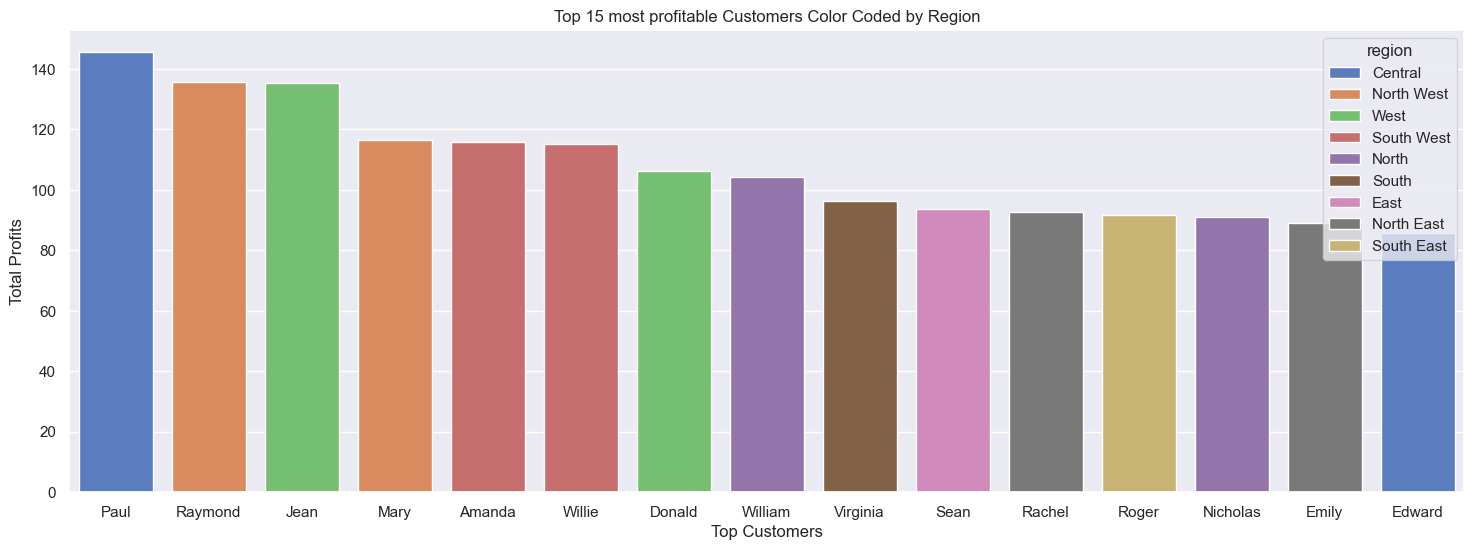

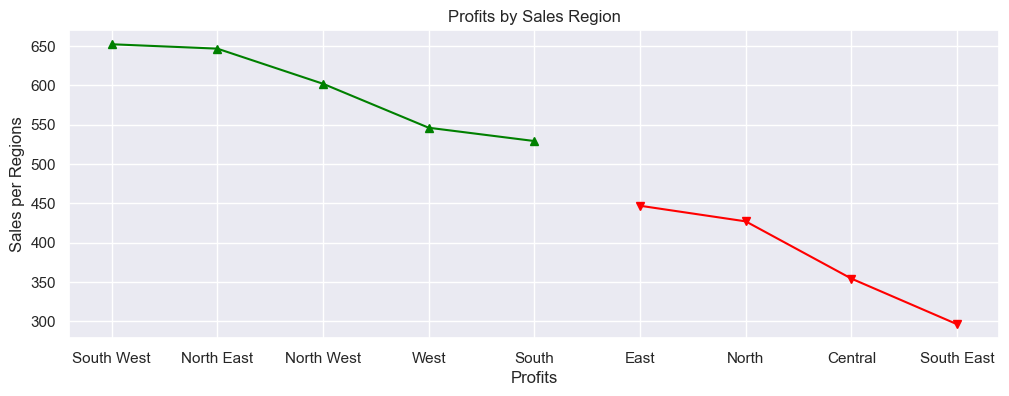

In [9]:
#Code to graph the Top 15 Customers.
sns.set(rc={'figure.figsize':(18,6)})

top_custs = sns.barplot(
    data=top_cust,
    x='customer_name_first', y='profit', hue='region',
    palette='muted', dodge=False
)

top_custs.set(xlabel='Top Customers', ylabel='Total Profits', 
    title='Top 15 most profitable Customers Color Coded by Region')

#This code block gives a graphical display of the regions based on their profitablity.
plt.figure(figsize=(12,4))

mask1 = top_region['profit'] >= 500
mask2 = top_region['profit'] < 500

plt.plot((top_region['region'])[mask1], (top_region['profit'])[mask1], marker = '^', color = 'green')
plt.plot((top_region['region'])[mask2], (top_region['profit'])[mask2], marker = 'v', color = 'red')

plt.title('Profits by Sales Region')
plt.xlabel('Profits')
plt.ylabel('Sales per Regions')

#plt.show()

top_custs.figure.savefig('final_files/report_files/top_15_custs.png')
plt.savefig('final_files/report_files/regions_by_profit.png')

Feature 5:
The below two blocks of coding show the Customers and Products with the lowest profits. Then sames these reports into the 'Report Files' folder.

In [10]:
#This code block shows the lowest 15 Customers by profits.
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['customer_id'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[True]).head(25)
low_cust = pd.merge(col_group, cu_data, on='customer_id', how='left')
low_cust.to_csv('final_files/report_files/low_cust.csv', sep=',', index=False)

#This code block shows the lowest products by profits.
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['product_id'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[True]).head(15)
low_prod = pd.merge(col_group, prd_data, on='product_id', how='left')
low_prod.to_csv('final_files/report_files/low_prod.csv', sep=',', index=False)

#print(low_cust.to_string())
#print(low_prod.to_string())